In [4]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# Problem 1

(100,) (100,)


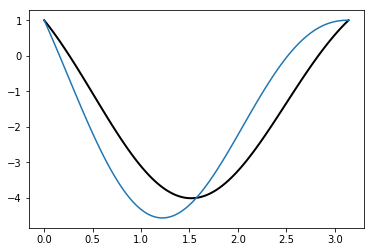

In [32]:
def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f, np.array([alpha,t0]), [a,b], atol=1e-10)[1,0]
        sol1 = odeint(f, np.array([alpha,t1]), [a,b], atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([y[1], -4*y[0]-9*np.sin(x)])

X = np.linspace(0,np.pi,100)
Y = solveSecant(ode,X,0,np.pi,1,1,10,-10,40)
Y2 = solveSecant(ode,X,0,np.pi,1,1,-10,0,40)

plt.plot(X,Y,'-k',linewidth=2)
plt.plot(X,Y2)
plt.show()

### What initial values $t_0$ and $t_1$ did you use to find the solutions?

$(10,-10)$, and  $(-10,0)$

# Problem 2

In [52]:
def find_t(f,a,b,alpha,beta,t0,maxI):
    sol = [0]

    i = 0
    while abs(sol[0]-beta) > 10**-8 and i < maxI:

        sol = odeint(f, np.array([alpha,t0,0,1]), [a,b], atol=1e-10)[1]
        y = sol[0]
        z = sol[2]
        t1 =  t0 - (y - beta)/z
        t0 = t1

        i = i+1

    if i == maxI:
        print("t not found")

    return t1

def solveNewton(f,X,a,b,alpha,beta,t0,maxI):

    t = find_t(f,a,b,alpha,beta,t0,maxI)
    sol = odeint(f,np.array([alpha,t,0,1]), X,atol=1e-10)[:,0]

    return sol

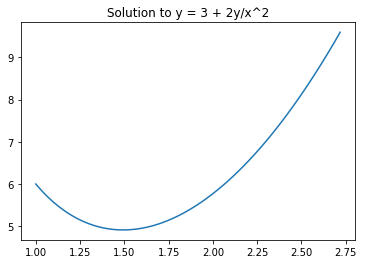

In [58]:
def ode(y,x):
    return np.array([y[1],3 + 2 * y[0] / x**2, y[3],2*y[2] / x**2])
    
X = np.linspace(1,np.e,100)
YZ = solveNewton(ode,X,1,np.e,6,np.exp(2) + 6/np.e,1,40)
plt.plot(X,YZ)
plt.title("Solution to y = 3 + 2y/x^2")
plt.show()

### What did you use as your initial guess?

Initial guess $t = 1$

# Problem 3

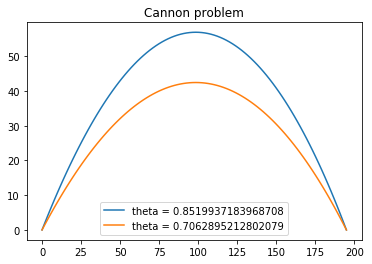

In [73]:
# g = 9.8067
mu = .0003

def ode(y,x):
    return np.array([np.tan(y[2]),-(g*np.sin(y[2])+mu*y[1]**2)/(y[1]*np.cos(y[2])),-g/y[1]**2])
    
def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 1
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f, np.array([alpha,45,t0]), [a,b], atol=1e-10)[1,0]
        sol1 = odeint(f, np.array([alpha,45,t1]), [a,b], atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,45,t]), X,atol=1e-10)[:,0]
    return sol,t

X = np.linspace(0,195,100)
Y1,t1 = solveSecant(ode,X,0,195,0,0,1,2,40)
Y2,t2 = solveSecant(ode,X,0,195,0,0,1,3,40)

plt.plot(X,Y1,label="theta = {}".format(t1))
plt.plot(X,Y2,label="theta = {}".format(t2))
plt.title("Cannon problem")
plt.legend()
plt.show()

### At what angle $\theta(0)$ should it be fired to land at a distance of 195 m?

$\theta = .852, .706$